# Social Network Graph link prediction - Facebook Dataset

### Problem Statement

Given a directed social graph, predict the connection (link) between the nodes

### Data Overview
Taken data from facebook's recruting challenge on kaggle https://www.kaggle.com/c/FacebookRecruiting  
data contains two columns source and destination edge in graph. The graph is a directed graph. 
    - Data columns (total 2 columns):  
    - source_node         int64  
    - destination_node    int64  

### Business Objective and constraint

1. There is no need of latency requirement. As given a time the graph is constant(as time changes the graph changes).So if we are asked to predict the link between the nodes we can do it beforehand also. There is no need to do it real time.

2. We need the probability of prediction i.e. we need the probabilty if there exist any edge between the nodes.

### Performance Metric

1. May be log loss
2. Accuracy score
3. Confusion matrix
4. F1 score - Facebook has decided winner based on F1 score.

In [1]:
##Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import math
from tqdm import tqdm
tqdm.pandas()


In [2]:
train_data = pd.read_csv(r'F:\data\Facebook friend recommendation\train\train.csv')
train_data.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [3]:
print("The no of edges are", len(train_data))

The no of edges are 9437519


In [4]:
train_data.isna().sum()

source_node         0
destination_node    0
dtype: int64

In [5]:
train_data.duplicated().value_counts()

False    9437519
dtype: int64

In [2]:
#Loading the data in graph form
g = nx.read_edgelist(r'F:\data\Facebook friend recommendation\train\mine\train_data.csv', delimiter=',', \
                     create_using=nx.DiGraph(), nodetype = int)

In [3]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


In [2]:
#Displaying a random graph of small size

subgraph_data = pd.read_csv(r'F:\data\Facebook friend recommendation\mine\train_data.csv',nrows=50)
subgraph_data.to_csv(r'F:\data\Facebook friend recommendation\mine\subgraph_data.csv', header=False, index=False)

In [3]:
#Loading the data in graph form
g_subgraph = nx.read_edgelist(r'F:\data\Facebook friend recommendation\mine\subgraph_data.csv', delimiter=',', \
                     create_using=nx.DiGraph(), nodetype = int)

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


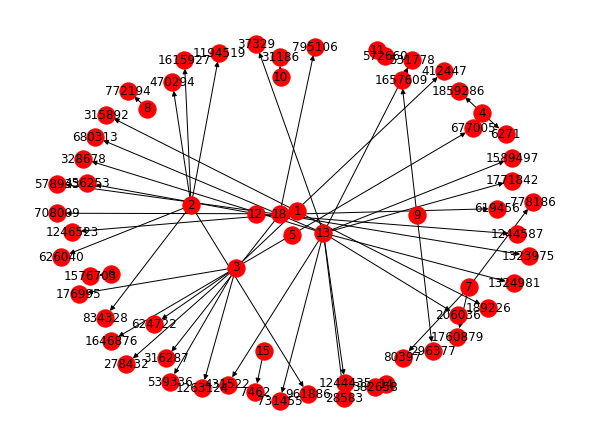

In [4]:
plt.figure(figsize=(8,6))
nx.draw(g_subgraph, pos=nx.spring_layout(g_subgraph), with_labels = True) #pos == position which means the positon on graph where each node lies
plt.draw()
print(nx.info(g_subgraph))

# Exploratory Data Analysis

In [6]:
print("The number of nodes in graph is",len(g.nodes))

The number of nodes in graph is 1862220


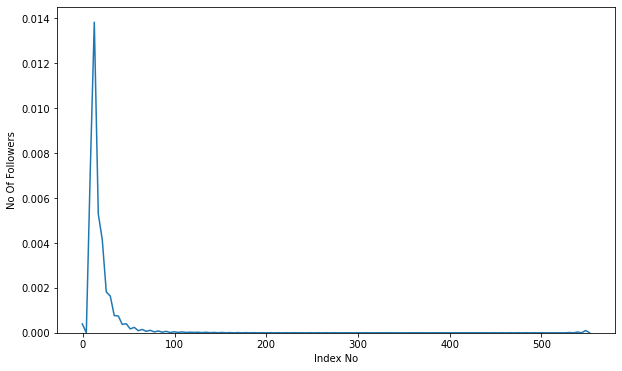

In [8]:
in_degree = list(dict(g.in_degree).values())
plt.figure(figsize=(10,6))
sns.distplot(in_degree, hist = False)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
#plt.xscale("log")
plt.show()

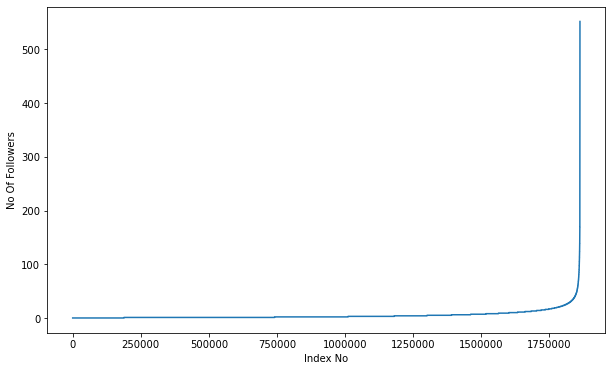

In [9]:
np.set_printoptions(suppress=True)
in_degree_sorted = sorted(list(dict(g.in_degree).values()))
plt.figure(figsize=(10,6))
plt.plot(in_degree_sorted)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.xscale("linear")
plt.ticklabel_format(useOffset=False, style ='plain')
#plt.xscale("log")
plt.show()

In [11]:
print("The top 10 count of followers are :")
pd.Series(in_degree).value_counts()[0:10]

The top 10 count of followers are :


1    552867
2    269805
0    188043
3    169779
4    120046
5     89894
6     70225
7     56187
8     45841
9     38293
dtype: int64

In [12]:
print("The max value of in degree is:",max(in_degree))

The max value of in degree is: 552


In [20]:
#Which node has max in_degree?

#max(dict(g.in_degree()), key = lambda x:dict(g.in_degree())[x]) #taking too much time

#Checking for first 100000 nodes:

in_degree_dict = dict((list(dict(g.in_degree).items()))[0:100000]) # picking up 100000 graph data

print("The node which has max number of in-degree value is :", max(in_degree_dict, key=lambda x:in_degree_dict[x]))

print("The number of in degree for",max(in_degree_dict, key=lambda x:in_degree_dict[x]),"is",in_degree_dict[max(in_degree_dict, key=lambda x:in_degree_dict[x])])

The node which has max number of in-degree value is : 415069
The number of in degree for 415069 is 552


In [16]:
for i in np.arange(0,101,10):
    print("The",i,"th percentile for in_degree is",np.percentile(in_degree,i))

The 0 th percentile for in_degree is 0.0
The 10 th percentile for in_degree is 0.0
The 20 th percentile for in_degree is 1.0
The 30 th percentile for in_degree is 1.0
The 40 th percentile for in_degree is 2.0
The 50 th percentile for in_degree is 2.0
The 60 th percentile for in_degree is 3.0
The 70 th percentile for in_degree is 5.0
The 80 th percentile for in_degree is 7.0
The 90 th percentile for in_degree is 12.0
The 100 th percentile for in_degree is 552.0


In [21]:
for i in np.arange(90,101,1):
    print("The",i,"th percentile for in_degree is",np.percentile(in_degree,i))

The 90 th percentile for in_degree is 12.0
The 91 th percentile for in_degree is 13.0
The 92 th percentile for in_degree is 14.0
The 93 th percentile for in_degree is 15.0
The 94 th percentile for in_degree is 17.0
The 95 th percentile for in_degree is 19.0
The 96 th percentile for in_degree is 21.0
The 97 th percentile for in_degree is 24.0
The 98 th percentile for in_degree is 29.0
The 99 th percentile for in_degree is 40.0
The 100 th percentile for in_degree is 552.0


In [22]:
for i in np.arange(99,100.1,.1):
    print("The",np.round(i,2),"th percentile for in_degree is",np.percentile(in_degree,i))

The 99.0 th percentile for in_degree is 40.0
The 99.1 th percentile for in_degree is 42.0
The 99.2 th percentile for in_degree is 44.0
The 99.3 th percentile for in_degree is 47.0
The 99.4 th percentile for in_degree is 50.0
The 99.5 th percentile for in_degree is 55.0
The 99.6 th percentile for in_degree is 61.0
The 99.7 th percentile for in_degree is 70.0
The 99.8 th percentile for in_degree is 84.0
The 99.9 th percentile for in_degree is 112.0
The 100.0 th percentile for in_degree is 551.9999999701977


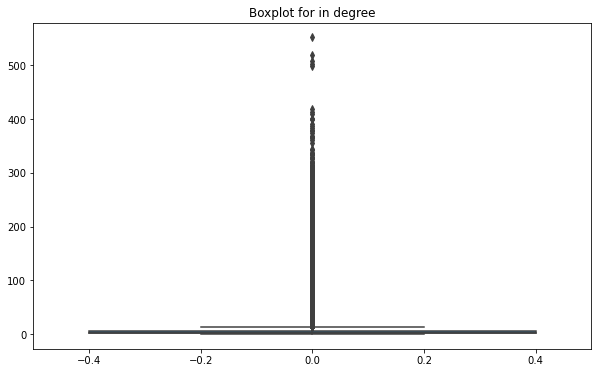

In [125]:
plt.figure(figsize=(10,6))
sns.boxplot(y = in_degree)
plt.xscale("linear")
plt.ticklabel_format(useOffset=False, style ='plain')
plt.title("Boxplot for in degree")
#plt.xscale("log")
plt.show()

### 2. out_degree

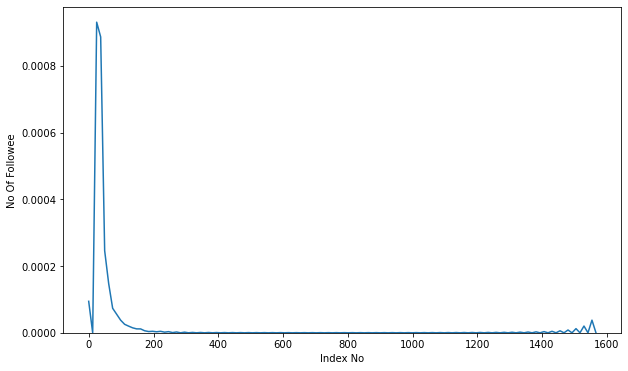

In [61]:
out_degree = list(dict(g.out_degree).values())
plt.figure(figsize=(10,6))
sns.distplot(out_degree, hist = False)
plt.xlabel('Index No')
plt.ylabel('No Of Followee')
#plt.xscale("log")
plt.show()

In [130]:
print("The top 10 count of out_degree are :")
pd.Series(out_degree).value_counts()[0:10]

The top 10 count of out_degree are :


1    495824
0    274512
2    247908
3    161928
4    116251
5     88752
6     69319
7     56499
8     46513
9     38556
dtype: int64

In [106]:
#Which node has max out_degree?

#max(dict(g.out_degree()), key = lambda x:dict(g.in_degree())[x]) #taking too much time

#Checking for first 100000 nodes:

out_degree_dict = dict(list(dict(g.out_degree).items())[0:100000]) # picking up 100000 graph data
print("The node which has max number of out degree value is :", max(out_degree_dict, key=lambda x:out_degree_dict[x]))

print("The number of out degree for node",max(out_degree_dict, key=lambda x:out_degree_dict[x]),"is",out_degree_dict[max(out_degree_dict, key=lambda x:out_degree_dict[x])])

The node which has max number of out degree value is : 4850
The number of out degree for node 4850 is 895


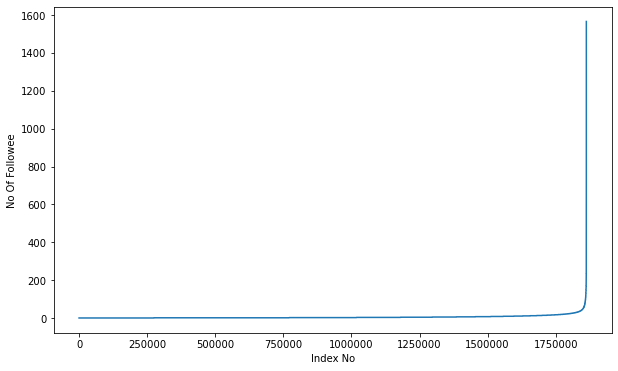

In [114]:
np.set_printoptions(suppress=True)
out_degree_sorted = sorted(list(dict(g.out_degree).values()))
plt.figure(figsize=(10,6))
plt.plot(out_degree_sorted)
plt.xlabel('Index No')
plt.ylabel('No Of Followee')
plt.xscale("linear")
plt.ticklabel_format(useOffset=False, style ='plain')
#plt.xscale("log")
plt.show()

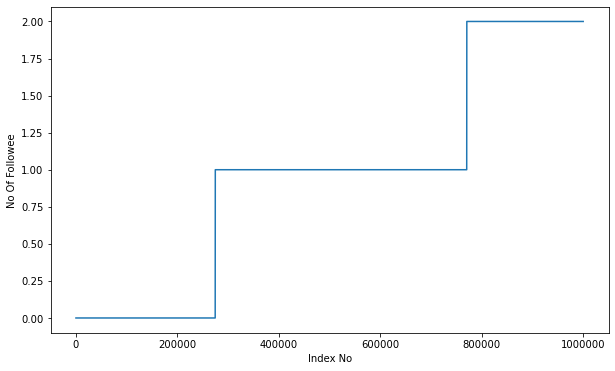

In [118]:
np.set_printoptions(suppress=True)
out_degree_sorted = sorted(list(dict(g.out_degree).values()))
plt.figure(figsize=(10,6))
plt.plot((out_degree_sorted[0:1000000]))
plt.xlabel('Index No')
plt.ylabel('No Of Followee')
plt.xscale("linear")
plt.ticklabel_format(useOffset=False, style ='plain')
#plt.xscale("log")
plt.show()

In [126]:
for i in np.arange(0,101,10):
    print("The",i,"th percentile for out_degree is",np.percentile(out_degree,i))

The 0 th percentile for out_degree is 0.0
The 10 th percentile for out_degree is 0.0
The 20 th percentile for out_degree is 1.0
The 30 th percentile for out_degree is 1.0
The 40 th percentile for out_degree is 1.0
The 50 th percentile for out_degree is 2.0
The 60 th percentile for out_degree is 3.0
The 70 th percentile for out_degree is 5.0
The 80 th percentile for out_degree is 7.0
The 90 th percentile for out_degree is 12.0
The 100 th percentile for out_degree is 1566.0


In [127]:
for i in np.arange(90,101,1):
    print("The",i,"th percentile for out_degree is",np.percentile(out_degree,i))

The 90 th percentile for out_degree is 12.0
The 91 th percentile for out_degree is 13.0
The 92 th percentile for out_degree is 14.0
The 93 th percentile for out_degree is 15.0
The 94 th percentile for out_degree is 17.0
The 95 th percentile for out_degree is 19.0
The 96 th percentile for out_degree is 21.0
The 97 th percentile for out_degree is 24.0
The 98 th percentile for out_degree is 29.0
The 99 th percentile for out_degree is 40.0
The 100 th percentile for out_degree is 1566.0


In [128]:
for i in np.arange(99,100.1,.1):
    print("The",i,"th percentile for out_degree is",np.percentile(out_degree,i))

The 99.0 th percentile for out_degree is 40.0
The 99.1 th percentile for out_degree is 42.0
The 99.19999999999999 th percentile for out_degree is 45.0
The 99.29999999999998 th percentile for out_degree is 48.0
The 99.39999999999998 th percentile for out_degree is 52.0
The 99.49999999999997 th percentile for out_degree is 56.0
The 99.59999999999997 th percentile for out_degree is 63.0
The 99.69999999999996 th percentile for out_degree is 73.0
The 99.79999999999995 th percentile for out_degree is 90.0
The 99.89999999999995 th percentile for out_degree is 123.0
The 99.99999999999994 th percentile for out_degree is 1565.9999993750826


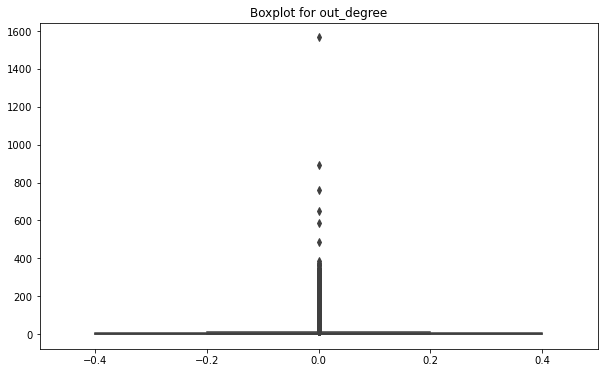

In [129]:
plt.figure(figsize=(10,6))
sns.boxplot(y = out_degree)
plt.xscale("linear")
plt.ticklabel_format(useOffset=False, style ='plain')
plt.title("Boxplot for out_degree")
plt.show()

In [140]:
# in_degree = 0 == "these are people who dont have any follower
print("The number of nodes who dont have any followers (in_degree = 0) are :",pd.Series(in_degree).value_counts().loc[0])
print("The percentage of lonely person (no follower) are",(pd.Series(in_degree).value_counts().loc[0]/len(in_degree))*100)

The number of nodes who dont have any friend / followers (in_degree = 0) are : 188043
The percentage of lonely person (no friend) are 10.097786512871734


In [141]:
# out_degree = 0 == "these are people who dont have any friend/follower
print("The number of nodes who doesnot follows anyone (out_degree = 0) are :",pd.Series(out_degree).value_counts().loc[0])
print("The percentage of celeb person (no following to others) are",(pd.Series(out_degree).value_counts().loc[0]/len(out_degree))*100)

The number of nodes who doesnot follows anyone (out_degree = 0) are : 274512
The percentage of celeb person (no following to others) are 14.741115442858524


In [160]:
#Find any node with in_degree, out_degree = 0 i.e. degree = 0
print("Checking if we have any node with degree = 0:")
degree_set = list(set(list(dict(g.degree).values())))

default_val = False
for i in degree_set:
    if i ==0:
        default_val = True
        break
print(default_val)
print("\n")
print("No node have degree = 0. It means that all the nodes have either an in_degree or out_degree.")

Checking if we have any node with degree = 0:
False


No node have degree = 0. It means that all the nodes have either an in_degree or out_degree.


In [191]:
#Predecessor and Successor returns all the nodes that sucessor and predessesor of a given node

#It will return no of nodes which are isolated i.e. no predecesor and no sucessor
from tqdm import tqdm
count = 0
for i in tqdm(g.nodes):
    if len(list(g.predecessors(i)))==0:
        if len(list(g.successors(i)))==0:
            count+=1
print("The number of nodes which are isolated (no predecessor and no sucessor) =",count)
print("These are the points which are isolated in social graph i.e. they dont have any follower and followee")

100%|█████████████████████████████| 1862220/1862220 [00:49<00:00, 37935.19it/s]

The number of nodes which are isolated (no predecessor and no sucessor) = 0


In [194]:
#Count the nodes who are just follower and not followee

from tqdm import tqdm
count = 0
for i in tqdm(g.nodes):
    if len(list(g.predecessors(i)))==0:
            count+=1
print("The number of nodes which are just followers and not followee (no predecessor but have sucessor) =",count)

100%|████████████████████████████| 1862220/1862220 [00:08<00:00, 228642.33it/s]

The number of nodes which are just followers and not followee (no predecessor but have sucessor) = 188043


In [195]:
#Count the nodes who are just followee (celebs) and dont follow any other node
from tqdm import tqdm
count = 0
for i in tqdm(g.nodes):
    if len(list(g.successors(i)))==0:
            count+=1
print("The number of nodes who are just followee (like celebs) and not follower (have predecessor but no sucessor) =",count)

100%|████████████████████████████| 1862220/1862220 [00:11<00:00, 165169.37it/s]

The number of nodes who are just followee (like celebs) and not follower (have predecessor but no sucessor) = 274512


In [196]:
#Count the no of nodes which have both followers and are also followee

from tqdm import tqdm
count = 0
for i in tqdm(g.nodes):
    if len(list(g.predecessors(i)))!=0:
        if len(list(g.successors(i)))!=0:
            count+=1
print("The number of nodes which are normal people (have predecessor and have sucessor both) =",count)
print("These are the points which are not isolated in social graph i.e. they have both follower and followee")

100%|████████████████████████████| 1862220/1862220 [00:12<00:00, 146690.78it/s]

The number of nodes which are normal people (have predecessor and have sucessor both) = 1399665
These are the points which are not isolated in social graph i.e. they have both follower and followee


In [209]:
# Degree - It represents the number of followers and followee

np.set_printoptions(suppress=True)
print("The basic statistics on degree is:")
pd.Series(list(dict(g.degree).values())).describe()

The basic statistics on degree is:


count    1.862220e+06
mean     1.013577e+01
std      1.829401e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.100000e+01
max      1.579000e+03
dtype: float64

In [210]:
degree = list(dict(g.degree).values())

In [212]:
for i in np.arange(0,101,10):
    print("The",i,"th percentile for degree is",np.percentile(degree,i))

The 0 th percentile for degree is 1.0
The 10 th percentile for degree is 1.0
The 20 th percentile for degree is 2.0
The 30 th percentile for degree is 2.0
The 40 th percentile for degree is 3.0
The 50 th percentile for degree is 4.0
The 60 th percentile for degree is 6.0
The 70 th percentile for degree is 9.0
The 80 th percentile for degree is 14.0
The 90 th percentile for degree is 24.0
The 100 th percentile for degree is 1579.0


In [213]:
for i in np.arange(90,101,1):
    print("The",i,"th percentile for degree is",np.percentile(degree,i))

The 90 th percentile for degree is 24.0
The 91 th percentile for degree is 26.0
The 92 th percentile for degree is 28.0
The 93 th percentile for degree is 31.0
The 94 th percentile for degree is 33.0
The 95 th percentile for degree is 37.0
The 96 th percentile for degree is 41.0
The 97 th percentile for degree is 48.0
The 98 th percentile for degree is 58.0
The 99 th percentile for degree is 79.0
The 100 th percentile for degree is 1579.0


In [215]:
for i in np.arange(99,100.1,.1):
    print("The",np.round(i,2),"th percentile for degree is",np.percentile(degree,i))

The 99.0 th percentile for degree is 79.0
The 99.1 th percentile for degree is 83.0
The 99.2 th percentile for degree is 87.0
The 99.3 th percentile for degree is 93.0
The 99.4 th percentile for degree is 99.0
The 99.5 th percentile for degree is 108.0
The 99.6 th percentile for degree is 120.0
The 99.7 th percentile for degree is 138.0
The 99.8 th percentile for degree is 168.0
The 99.9 th percentile for degree is 221.0
The 100.0 th percentile for degree is 1578.999999500811


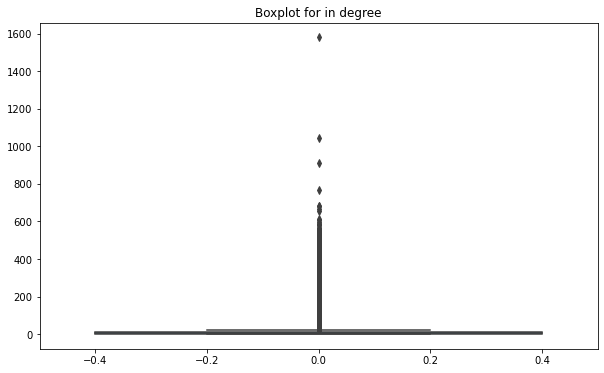

In [217]:
plt.figure(figsize=(10,6))
sns.boxplot(y = degree)
plt.xscale("linear")
plt.ticklabel_format(useOffset=False, style ='plain')
plt.title("Boxplot for in degree")
#plt.xscale("log")
plt.show()

In [228]:
#Which node which has max degree?
degree_series = pd.Series(dict(g.degree))

print("The max degree of a node is",max(degree_series))
print("\n")
print("The node with max degree is :")
degree_series.loc[degree_series==max(degree_series)]

in_degree_dict = dict(g.in_degree)
out_degree_dict = dict(g.out_degree)
print("The in-degree for node 1492489 is", in_degree_dict[1492489])
print("The out-degree for node 1492489 is", out_degree_dict[1492489])

The max degree of a node is 1579


The node with max degree is :
The in-degree for node 1492489 is 13
The out-degree for node 1492489 is 1566


In [232]:
print("The top 10 degree counts are :")
pd.Series(list(dict(g.degree).values())).value_counts()[0:10]

The top 10 degree counts are :


1     334291
2     329273
3     151273
4     144683
5      94279
6      88499
7      66413
8      61704
9      49911
10     46111
dtype: int64

In [233]:
# Count the no of nodes with follower + folowing <10

count = 0
for i in tqdm(g.nodes):
    if len(list(g.predecessors(i)))+len(list(g.successors(i)))<=10:
        count = count +1
print("The number of nodes with follower + folowing less that or equal to 10 are",count)

100%|█████████████████████████████| 1862220/1862220 [00:19<00:00, 94672.60it/s]

The number of nodes with follower + folowing less that or equal to 10 are 1366437


# Posing as a Classification problem

In [242]:
#Here in out graph data all the point are having an edge and these points will be classified as of class 1 as we have an edge 
#existing between them. For a classification problem we need to make have nodes which do not have any edge between them and then
#between all these nodes we will have no edges and we will classify those points as of class 0

#So in short we need to create artificial graph points where we dont have any edge between the nodes.

###  Generating some edges which are not present in graph for supervised learning

Generated Bad links from graph which are not in graph and whose shortest path is greater than 2.



#### Out of nodes in range 0 to 1862221 which of them are not present ??

In [27]:
nodes_not_in_g = [i for i in tqdm(range(0, len(g.nodes)+2)) if i not in g.nodes]
print("The nodes which are not in g are - ",nodes_not_in_g)

100%|████████████████████████████| 1862222/1862222 [00:06<00:00, 302761.94it/s]

The nodes which are not in g are -  [0, 1862221]


In [4]:
#Code to create new bad edges and bad nodes such that there in no direct edges exist between them and the path length > 2
#Here i am taking 200000 data points because of computational cost.

import networkx as nx
bad_edges_list = []

count = 0
for i in tqdm(range(0,200000)):
    rand_num1 = np.random.randint(1, 1862221)
    rand_num2 = np.random.randint(1, 1862221)
    try:
        if (nx.shortest_path_length(g, rand_num1, rand_num2)>2):
            bad_edges_list.append((rand_num1, rand_num2))
    except nx.NetworkXNoPath:
        pass
    
       
            
print("The length of no node list is",len(bad_edges_list))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [08:50<00:00, 376.92it/s]

The length of no node list is 124167


In [7]:
file_name = r'F:\data\Facebook friend recommendation\mine\no_edge_data.pkl'
open_file = open(file_name, "rb")
bad_edges_list = pickle.load(open_file) #This is a list containing tuples and each tuple has two nodes which are not 
                                        #connected in graph g.
open_file.close()

In [8]:
print("The length of no node list is",len(bad_edges_list))

The length of no node list is 124167


### Creating a dataframe - df_neg(This dataframe contains the source node and target node which donot have any edge between them and is created from bad_edges_list)

In [10]:
df_neg = pd.DataFrame(np.array(bad_edges_list), columns=["source_node","destination_node"])
df_neg["status"] = 0


print("The length of df_neg is",len(df_neg))

The length of df_neg is 124167


In [11]:
df_neg.head()

,source_node,destination_node,status
0,692599,1109326,0
1,619595,810513,0
2,1721053,1455821,0
3,1792164,384797,0
4,395791,626325,0


In [13]:
df_pos = pd.read_csv(r'F:\data\Facebook friend recommendation\train\train.csv')

df_pos['status'] = 1
print("The length of df_pos is",len(df_pos))
df_pos.head()

The length of df_pos is 9437519


,source_node,destination_node,status
0,1,690569,1
1,1,315892,1
2,1,189226,1
3,2,834328,1
4,2,1615927,1


# Train test split 

#Splitting data into 80-20  - positive links and negative links seperatly because we need positive training data only for 
creating graph and for feature generation

In [16]:
from sklearn.model_selection import train_test_split

x_train_pos, x_test_pos, y_train_pos, y_test_pos = train_test_split(df_pos.iloc[:,0:2], df_pos['status'], test_size = 0.2, random_state = 1)
x_train_neg, x_test_neg, y_train_neg, y_test_neg = train_test_split(df_neg.iloc[:,0:2], df_neg['status'], test_size = 0.2, random_state = 1)

print('='*60)
print("Number of nodes in the train data graph with edges", x_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", x_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", x_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", x_test_neg.shape[0])


Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 99333
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 24834


In [17]:
#removing header and saving

x_train_pos.to_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\train_pos_after_eda.csv',header=False, index=False)
x_test_pos.to_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\test_pos_after_eda.csv',header=False, index=False)
x_train_neg.to_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\train_neg_after_eda.csv',header=False, index=False)
x_test_neg.to_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\test_neg_after_eda.csv',header=False, index=False)

In [2]:
train_graph = nx.read_edgelist(r'F:\data\Facebook friend recommendation\mine\train_test_csv\train_pos_after_eda.csv', \
            delimiter=',', create_using=nx.DiGraph(), nodetype = int)
test_graph = nx.read_edgelist(r'F:\data\Facebook friend recommendation\mine\train_test_csv\test_pos_after_eda.csv', \
            delimiter=',', create_using=nx.DiGraph(), nodetype = int)

print(nx.info(train_graph))
print(nx.info(test_graph))

Name: 
Type: DiGraph
Number of nodes: 1780708
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399
Name: 
Type: DiGraph
Number of nodes: 1145404
Number of edges: 1887504
Average in degree:   1.6479
Average out degree:   1.6479


In [4]:
#Using the AAIC train_pos data and test_pos data because of the computational complexity. This is done for positive data points only.

train_graph = nx.read_edgelist(r'F:\data\Facebook friend recommendation\Facebook-20201030T080049Z-001\Facebook\data\after_eda\train_pos_after_eda.csv', \
            delimiter=',', create_using=nx.DiGraph(), nodetype = int)
test_graph = nx.read_edgelist(r'F:\data\Facebook friend recommendation\Facebook-20201030T080049Z-001\Facebook\data\after_eda\test_pos_after_eda.csv', \
            delimiter=',', create_using=nx.DiGraph(), nodetype = int)

print(nx.info(train_graph))
print(nx.info(test_graph))

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399
Name: 
Type: DiGraph
Number of nodes: 1144623
Number of edges: 1887504
Average in degree:   1.6490
Average out degree:   1.6490


In [3]:
print("The number of distinct nodes in train_graph_pos is",len(set(train_graph.nodes)))
print("The number of distinct nodes in test_graph_pos is",len(set(test_graph.nodes)))

The number of distinct nodes in train_graph_pos is 1780708
The number of distinct nodes in test_graph_pos is 1145404


In [4]:
#No of nodes that are common between the train_graph_pos and test_graph_pos.

train_pos_nodes = set(train_graph.nodes)
test_pos_nodes = set(test_graph.nodes)

print("In train - test data for Positive :")
print("The number of nodes that are intersection in train and test POS are",len(train_pos_nodes.intersection(test_pos_nodes)))
print("The number of nodes that are union in train and test POS are",len(train_pos_nodes.union(test_pos_nodes)))

In train - test data for Positive :
The number of nodes that are intersection in train and test POS are 1063892
The number of nodes that are union in train and test POS are 1862220


In [5]:
print("So we have have a problem of cold start as some of the data (nodes) from test is not present in training data")
print("The number of nodes not present in training data are",len(set(test_graph.nodes))-len(train_pos_nodes.intersection(test_pos_nodes)))

So we have have a problem of cold start as some of the data (nodes) from test is not present in training data
The number of nodes not present in training data are 81512


# Featurization 

The most challenging task is how to do the featurization for the graph data. We will use a bunch of featurization techniques for featurization of graph data.

Refer https://medium.com/@cynosuremishra01/different-featurization-techniques-for-graph-related-problems-in-machine-learning-9c9d60caae60 

1. Jaccard Distance
2. Cosine Similarities
3. Page Rank
4. Shortest Path
5. Connected Components
6. Adar Index
7. Kartz Centrality
8. HITS Score
9. Preferential Attachment


## 1.0 Similarity measure

### 1.1 Jaccard Distance (Similarity)

The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. 

The higher the ratio of Jaccard distance there is more probabiltiy of the link between X and Y.

\begin{equation}
j = \frac{|X\cap Y|}{|X \cup Y|} 
\end{equation}

In [3]:
#The logic behind this featurization is that if the followers of both node1 and node2 is same then its highly likely that 
#the simiarity between node1 and node2 is high and node1 and node2 should be following each other

def jaccard_for_predecessor(node1, node2):
    try:
        if ((len(set(train_graph.predecessors(node1)))==0) | (len(set(train_graph.predecessors(node2)))==0)):
            jaccard_sim_for_pred = 0
        else:
            jaccard_sim_for_pred = len(set(train_graph.predecessors(node1)).intersection(set(train_graph.predecessors(node2))))/ \
                        len(set(train_graph.predecessors(node1)).union(set(train_graph.predecessors(node2))))
    except:
        jaccard_sim_for_pred = 0

    return jaccard_sim_for_pred

In [10]:
#one test case
print(jaccard_for_predecessor(273084,1505602))

0.0


In [11]:
#node 1635354 not in graph 
print(jaccard_for_predecessor(273084,1635354))

0


In [4]:
def jaccard_for_successor(node1, node2):
    
    try:
        if ((len(set(train_graph.successors(node1)))==0) | (len(set(train_graph.successors(node2)))==0)):
            jaccard_sim_for_suc = 0
        else:
            jaccard_sim_for_suc = len(set(train_graph.successors(node1)).intersection(set(train_graph.successors(node2))))/ \
                        len(set(train_graph.successors(node1)).union(set(train_graph.successors(node2))))
    except:
        jaccard_sim_for_suc = 0
    
    return jaccard_sim_for_suc

In [13]:
#one test case
print(jaccard_for_successor(273084,1505602))

0.0


In [14]:
#node 1635354 not in graph 
print(jaccard_for_successor(273084,1635354))

0


In [5]:
def jaccard_for_pred_succ(node1, node2):
    
    try:
        if ((len(set(train_graph.successors(node1)))==0) | (len(set(train_graph.predecessors(node2)))==0)):
            jaccard_sim_for_pred_succ = 0
        else:
            jaccard_sim_for_pred_succ = len(set(train_graph.successors(node1)).intersection(set(train_graph.predecessors(node2))))/ \
                        len(set(train_graph.successors(node1)).union(set(train_graph.predecessors(node2))))
    except:
        jaccard_sim_for_pred_succ = 0
        
    return jaccard_sim_for_pred_succ

In [16]:
#one test case
print(jaccard_for_pred_succ(273084,1505602))

0.0


In [17]:
#node 1635354 not in graph 
print(jaccard_for_successor(273084,1635354))

0


## 1.2 Cosine distance (similarity)

\begin{equation}
CosineDistance = \frac{|X\cap Y|}{|X|\cdot|Y|} 
\end{equation}

In [6]:
def cosine_for_predecessor(node1, node2):
    
    try:
        if ((len(set(train_graph.predecessors(node1)))==0) | (len(set(train_graph.predecessors(node2)))==0)):
            cosine_sim_for_pred = 0
        else:
            cosine_sim_for_pred = len(set(train_graph.predecessors(node1)).intersection(set(train_graph.predecessors(node2))))/ \
                        (len(set(train_graph.predecessors(node1)))*len(set(train_graph.predecessors(node2))))
    except:
        cosine_sim_for_pred = 0
        
    return cosine_sim_for_pred

In [19]:
#one test case
print(cosine_for_predecessor(273084,1505602))

0.0


In [20]:
#node 1635354 not in graph 
print(cosine_for_predecessor(273084,1635354))

0


In [7]:
def cosine_for_successor(node1, node2):
    
    try:
        if ((len(set(train_graph.successors(node1)))==0) | (len(set(train_graph.successors(node2)))==0)):
            cosine_sim_for_suc = 0
        else:
            cosine_sim_for_suc = len(set(train_graph.successors(node1)).intersection(set(train_graph.successors(node2))))/ \
                        (len(set(train_graph.successors(node1)))*len(set(train_graph.successors(node2))))
    except:
        cosine_sim_for_suc = 0
    
    return cosine_sim_for_suc

In [22]:
#node 1635354 not in graph 
print(cosine_for_successor(273084,1635354))

0


In [8]:
def cosine_for_pred_suc(node1, node2):
    
    try:
        if ((len(set(train_graph.successors(node1)))==0) | (len(set(train_graph.predecessors(node2)))==0)):
            cosine_sim_for_pred_suc = 0
        else:
            cosine_sim_for_pred_suc = len(set(train_graph.successors(node1)).intersection(set(train_graph.predecessors(node2))))/ \
                        (len(set(train_graph.successors(node1)))*len(set(train_graph.predecessors(node2))))
    except:
        cosine_sim_for_pred_suc = 0
        
    return cosine_sim_for_pred_suc

In [24]:
#node 1635354 not in graph 
print(cosine_for_successor(273084,1635354))

0


## 1.3 PageRank

PageRank was an algo developed by Google to rank which page should come first when a search happens in google. It uses graph structure and decide the rank of a page (say A) based on all the websites attached to website A.

It is an iterative algo and it computes the pagerank of all the nodes in the graph structure. It returns me a dictionary with node as key and values as the rank of all the node. Intresting thing to note is that the sum of all the pagerank of all nodes equals to 1.

The Pagerank of a website(A) is more if more no of nodes(websites) are pointing to website A. It means that we can reach to website (A) in many nubmer of ways from other websites.The higher the pagerank of a website the more important that website will be. Also if an important website(A) is linked to another website(B) then B will also have high page rank value.

#Useful links for pagrank:
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
#https://www.youtube.com/watch?v=P8Kt6Abq_rM

In [9]:
#Here we are importing the pagerank dictionary created by AAIC because of computaional complexity of running above code.
#https://stackoverflow.com/questions/42193963/file-extension-naming-p-vs-pkl-vs-pickle  -- .p is same as.pkl

import pickle
file_name = r'F:\data\Facebook friend recommendation\Facebook-20201030T080049Z-001\Facebook\data\fea_sample\page_rank.p'
open_file = open(file_name, "rb")
pagerank_dict = pickle.load(open_file)
open_file.close()

In [10]:
print("The length of pagerank dict is",len(pagerank_dict))

The length of pagerank dict is 1780722


In [11]:
print("The first 5 items of pagerank dict are :")
list(pagerank_dict.items())[0:5]

The first 5 items of pagerank dict are :


[(273084, 2.0452904537613205e-06),
 (1505602, 3.459962832379924e-07),
 (912810, 1.039181158882892e-06),
 (1678443, 1.7938059019480253e-06),
 (365429, 1.033021623853361e-06)]

In [12]:
print("The min value of pagerank is",min(pagerank_dict.values()))
print("The max value of pagerank is",max(pagerank_dict.values()))
print("The avg value of pagerank is",np.mean(list(pagerank_dict.values())))

The min value of pagerank is 1.6556497245737814e-07
The max value of pagerank is 2.7098251341935827e-05
The avg value of pagerank is 5.615699699336493e-07


In [10]:
# Ques - what should be the page rank for the nodes which are not present in pagerank_dict?
#We will put the median value of the pagerank for the nodes not there in the dictionary.

median_pagerank = np.median(list(pagerank_dict.values()))
print("The median value of pagerank is",median_pagerank)

The median value of pagerank is 3.9069177553685355e-07


In [11]:
#Function to calculate the pagerank of a node given an input node

import pickle
file_name = r'F:\data\Facebook friend recommendation\Facebook-20201030T080049Z-001\Facebook\data\fea_sample\page_rank.p'
open_file = open(file_name, "rb")
pagerank_dict = pickle.load(open_file)
open_file.close()

median_pagerank = np.median(list(pagerank_dict.values()))

def pagerank_node(node):
    
    pagerank = pagerank_dict.get(node, median_pagerank)
   
    return pagerank

In [41]:
#Testing Pagerank function
pagerank_node(912810)

1.039181158882892e-06

## 1.4 Shortest Path

The shortest path for the train_data_pos will be 1 because those points are directly connected. But what we will do is we will remove those edges(of length 1) and then try to find the next shortest path length. This will give me a much better picture for the datapoints. 

In [12]:
def shortest_path_length(node1, node2):
    try:
        if train_graph.has_edge(node1, node2):
            train_graph.remove_edge(node1, node2) #this removes the edge from the graph permanently.
            p = nx.shortest_path_length(train_graph, node1, node2)
        else:
            p = nx.shortest_path_length(train_graph, node1, node2)
            
    except:
        p = -1  #if the nodes from test data is not there in train data then above code will give me error. 
               #So we will put "-1" if no node exist 
    
    return p

In [19]:
#testing
shortest_path_length(77697, 826021)

10

In [33]:
#testing
shortest_path_length(669354,1635354)

-1

## 1.5  Weakly / Strongly connected components (Community)

Strongly connected component is a directed sub graph where nodes are connected such a way that, every node is reachable from other nodes of that subgraph. 
On the other hand weakly connected component is directed sub graph which is unreachable from other nodes of graph or sub graph. But if ignore the direction we can go from any node to other node. 
So weakly connected component is one in which all nodes are connected by some path if we ignore the directions. 

Note: If one edge is present between the two weakly connected community then both of them will be combined to one community

Logic of using this feature: - 

Here we are trying to find the community of weakly connected component. So for ex we can have a weakly connected community of college friends and another weakly connected community of office friends. 
So a waekly connected components in graph theory can be thought of community of people who shares something similar amongst themselves.
In this feature we are checking if the two nodes(Ui, Uj) belong to same weakly connected component community. If yes then its highly likely that they share common intrests and they might be friends. This feature will be a binary feature (0=False / 1=True)

In [13]:
communities = list(nx.weakly_connected_components(train_graph)) #It returns a list of sets and in each set we have nodes which 
                                                                #form a weakly connected community

In [14]:
def belongs_to_same_weakly_community(node1, node2):
    if (node1 in train_graph.nodes) and (node2 in train_graph.nodes):
            for community in communities:
                if ((node1 in community) and (node2 in community)):
                    return 1
                else:
                    return 0
    else:
        return -1 #returns -1 if either of the node1 or node2 is not there in graph nodes(among all nodes).

In [15]:
print("The number of weakly connected communities are",len(communities))
print("The number of nodes in weakly connected community 1 is",len(communities[0]))
print("The number of nodes in weakly connected community 2 is",len(communities[1]))
print("The number of nodes in weakly connected community 3 is",len(communities[2]))
print("The number of nodes in weakly connected community 4 is",len(communities[3]))
print("The number of nodes in weakly connected community 5 is",len(communities[4]))
print("The number of nodes in weakly connected community 6 is",len(communities[5]))
print("\n")
print("The max no of nodes in a community is",max([len(i) for i in communities]))
print("The percentage of nodes lying in a single community is",(max([len(i) for i in communities])/len(train_graph.nodes))*100)

The number of weakly connected communities are 48828
The number of nodes in weakly connected community 1 is 1649472
The number of nodes in weakly connected community 2 is 3
The number of nodes in weakly connected community 3 is 21
The number of nodes in weakly connected community 4 is 2
The number of nodes in weakly connected community 5 is 4
The number of nodes in weakly connected community 6 is 2


The max no of nodes in a community is 1649472
The percentage of nodes lying in a single community is 92.63012240075295


In [16]:
strong_communities = list(nx.strongly_connected_components(train_graph)) #It returns a list of sets and in each set we have nodes which form a strongly connected community

def belongs_to_same_strongly_community(node1, node2):
    if (node1 in train_graph.nodes) and (node2 in train_graph.nodes):
            for community in strong_communities:
                if ((node1 in community) and (node2 in community)):
                    return 1
                else:
                    return 0
    else:
        return -1 #returns -1 if either of the node1 or node2 is not there in graph nodes(among all nodes).

In [17]:
print("The number of strongly connected communities are",len(strong_communities))
print("The number of nodes in strongly connected community 1 is",len(strong_communities[0]))
print("The number of nodes in strongly connected community 2 is",len(strong_communities[1]))
print("The number of nodes in strongly connected community 3 is",len(strong_communities[2]))
print("The number of nodes in strongly connected community 4 is",len(strong_communities[3]))
print("The number of nodes in strongly connected community 5 is",len(strong_communities[4]))
print("The number of nodes in strongly connected community 6 is",len(strong_communities[5]))
print("\n")
print("The max no of nodes in a community is",max([len(i) for i in strong_communities]))
print("The percentage of nodes lying in a single community is",(max([len(i) for i in strong_communities])/len(train_graph.nodes))*100)

The number of strongly connected communities are 611052
The number of nodes in strongly connected community 1 is 1
The number of nodes in strongly connected community 2 is 1
The number of nodes in strongly connected community 3 is 1
The number of nodes in strongly connected community 4 is 1
The number of nodes in strongly connected community 5 is 1
The number of nodes in strongly connected community 6 is 1


The max no of nodes in a community is 1083453
The percentage of nodes lying in a single community is 60.84394521729559


## 1.6 Adamic - Adar Index

Adamic Adar is a measure used to compute the closeness of nodes based on their shared neighbors. The neighours of a node A are basically all the nodes (incoming or outgoing) which are connected to the node A. 

So in Adar Index we calculate the chances if there is a link between the node A and node B. It is based on concept that common nodes between two node A and B with very large neighbourhoods of the common node are less significant when predicting a connection between two nodes A and B.
On the other hand if the common connected nodes have a small neighbourhood then its highly likely that the two nodes A and B can we friends.

$$A(x,y)=\sum_{u \in N(x) \cap N(y)}\frac{1}{log(|N(u)|)}$$

Higher the Adar index between the two nodes the more chances that the two nodes are friends or folowing each other.

Note - Adar index is defined only for undirected graph so we need to tweak it as per our data

In [41]:
def adamic_adar_index(node1, node2):
    
    try:
        node1_neighbours = set(train_graph.predecessors(node1)).union(set(train_graph.successors(node1)))
        node2_neighbours = set(train_graph.predecessors(node2)).union(set(train_graph.successors(node2)))
    
        common_nodes = list(node1_neighbours.intersection(node2_neighbours))
        if len(common_nodes)!=0:
            sum = 0
            for i in common_nodes:
                sum = sum + 1/np.log(len(list(train_graph.successors(i))) + len(list(train_graph.predecessors(i))))
            adar_index = sum
        
        else:
            adar_index = 0
    
    except:
        adar_index = 0
    
    return adar_index   #Higher the adar index better is the chances to have relationship between A and B.

In [20]:
adamic_adar_index(1,189226)

0.2769378934088574

In [41]:
adamic_adar_index(669354,1635354)

0

## 1.7 Is Person following back

Here we are checking that given two nodes(A, B), can A be following B? So we can come up with a feature if B is following A or not. If B is following A then there is high chances that A will follow B too.

In [14]:
def is_following_back(node1, node2):
    if ((node1 in list(train_graph.nodes)) and (node2 in list(train_graph.nodes))):
        if train_graph.has_edge(node2, node1):
            return 1
        else:
            return 0
    else:
        return -1

In [43]:
is_following_back(1,189226)

1

In [44]:
is_following_back(1,1892261234)

-1

In [45]:
is_following_back(669354,1635354)

-1

## 1.8 Katz Centrality

It is very similar to Pagerank algorithm where it tells me which website is more important by assigning higher pagerank value to more important nodes.

Similarly the Katz centrality of a node is a measure of centrality in a network. For each node it looks as them a central node and find the influence of all the neighbour node connected to central node and all the nodes connected to neighbour node. So it looks at the influence of all the connected nodes and adjacent to connected nodes to the central node. 

Note - Katz centrality computes the relative influence of a node within a network by measuring the number of the immediate neighbors (first degree nodes) and also all other nodes in the network that connect to the node under consideration through these immediate neighbors.

In [19]:
#Here we are importing the katz centrality dictionary created by AAIC because of computaional complexity of running above code.
#https://stackoverflow.com/questions/42193963/file-extension-naming-p-vs-pkl-vs-pickle  -- .p is same as.pkl

import pickle
file_name = r'F:\data\Facebook friend recommendation\Facebook-20201030T080049Z-001\Facebook\data\fea_sample\katz.p'
open_file = open(file_name, "rb")
katz_centrality_dict = pickle.load(open_file)
open_file.close()

In [20]:
print("The first 5 items of katz_centrality_dict are :")
list(katz_centrality_dict.items())[0:5]

The first 5 items of katz_centrality_dict are :


[(273084, 0.0007729488250589932),
 (1505602, 0.0007555174573470715),
 (912810, 0.0007705382111121319),
 (1678443, 0.0007611069974457382),
 (365429, 0.0009111502234612306)]

In [29]:
print("The min value of katz_centrality is",min(katz_centrality_dict.values()))
print("The max value of katz_centrality is",max(katz_centrality_dict.values()))
print("The avg value of katz_centrality is",np.mean(list(katz_centrality_dict.values())))

The min value of katz_centrality is 0.0007313532484065916
The max value of katz_centrality is 0.003394554981699122
The avg value of katz_centrality is 0.0007483800935468491


In [30]:
# Ques - what should be the katz centrality for the nodes which are not present in katz_centrality_dict?
#We will put the median value of the katz_centrality for the nodes not there in the dictionary.

median_katz_centrality = np.median(list(katz_centrality_dict.values()))
print(median_katz_centrality)

0.0007388558088692591


In [40]:
#Function to calculate the katz centrality of a node given an input node

import pickle
file_name = r'F:\data\Facebook friend recommendation\Facebook-20201030T080049Z-001\Facebook\data\fea_sample\katz.p'
open_file = open(file_name, "rb")
katz_centrality_dict = pickle.load(open_file)
open_file.close()

median_katz_centrality = np.median(list(katz_centrality_dict.values()))

def katzCentrality_node(node):
    
    katzCentrality = katz_centrality_dict.get(node, median_katz_centrality)
   
    return katzCentrality

In [22]:
#Testing KatzCentrality function
katzCentrality_node(273084)

0.0007729488250589932

## 1.9 HITS Score (Hyperlink Induced Topic Search)
HITS; also known as hubs and authorities. Its a very important algo in website search.

When internet started we have two types of pages like yahoo.com (directory) and other one is cnbc.com where we get into from various other websites.

In 2020(new world) there are two types of pages:
1. Hubs - Hubs are basically directories where we have a lot of outdegree like Yahoo.com, google.com etc
2. Authority - Authorities are basically pages where we have a lots of indegree like cnn.com. havard.edu etc.

What HITS algo returns?<br>
For each webpage it gives two scores - Hub score and authority score based on the outdegree and indegree.

How algo works?<br>
At the start for each webpage (p) the hub score is 1 and authority score is also 1.Its an iterative algo.
Now the authority of webpage(p) is summation of all the hub score of pages linking to webpage (p)
Similary the hub score of webpage(p) is summation of all the authority score of pages linking to webpage (p)
So this will give me the authority score and hub score for each page after n no of iteration.

#################################################################################################################

The HITS algorithm computes two numbers for a node. <b>Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.

https://en.wikipedia.org/wiki/HITS_algorithm

In [23]:
#Here we are importing the HITS score dictionary created by AAIC because of computaional complexity of running above code.
#https://stackoverflow.com/questions/42193963/file-extension-naming-p-vs-pkl-vs-pickle  -- .p is same as.pkl

import pickle
file_name = r'F:\data\Facebook friend recommendation\Facebook-20201030T080049Z-001\Facebook\data\fea_sample\hits.p'
open_file = open(file_name, "rb")
hits_score_dict = pickle.load(open_file)
open_file.close()

In [24]:
print("The length of Hubs score dict is",len(hits_score_dict[0]))
print("The length of Authority score dict is",len(hits_score_dict[1]))

The length of Hubs score dict is 1780722
The length of Authority score dict is 1780722


In [25]:
print("The min value of hubs score is",min(hits_score_dict[0].values()))
print("The max value of hubs score is",max(hits_score_dict[0].values()))
print("The avg value of hubs score is",np.mean(list(hits_score_dict[0].values())))

The min value of hubs score is 0.0
The max value of hubs score is 0.004868653378780953
The avg value of hubs score is 5.615699699370866e-07


In [34]:
print("The min value of authority score is",min(hits_score_dict[1].values()))
print("The max value of authority score is",max(hits_score_dict[1].values()))
print("The avg value of authority score is",np.mean(list(hits_score_dict[1].values())))

The min value of authority score is 0.0
The max value of authority score is 0.0054775458498681736
The avg value of authority score is 5.615699699360255e-07


In [35]:
# Ques - what should be the hubs nd authority for the nodes which are not present in dict nodes?
#We will put the mean value of the hubs nd authority for the nodes not there in the dictionary.

mean_hub_score= np.mean(list(hits_score_dict[0].values()))
print("The mean hub score is",mean_hub_score)
mean_authority_score= np.mean(list(hits_score_dict[1].values()))
print("The mean authority score is",mean_authority_score)

The mean hub score is 5.615699699370866e-07
The mean authority score is 5.615699699360255e-07


In [39]:
#Function to calculate the hub score of a node given an input node

import pickle
file_name = r'F:\data\Facebook friend recommendation\Facebook-20201030T080049Z-001\Facebook\data\fea_sample\hits.p'
open_file = open(file_name, "rb")
hits_score_dict = pickle.load(open_file)
open_file.close()

mean_hub_score= np.mean(list(hits_score_dict[0].values()))

def hubScore_node(node):
    
    hubScore = hits_score_dict[0].get(node, mean_hub_score)
   
    return hubScore

In [55]:
#Test Function to calculate the Hub Score
hubScore_node(273084)

1.9431321853230816e-13

In [38]:
#Function to calculate the Authority score of a node given an input node

import pickle
file_name = r'F:\data\Facebook friend recommendation\Facebook-20201030T080049Z-001\Facebook\data\fea_sample\hits.p'
open_file = open(file_name, "rb")
hits_score_dict = pickle.load(open_file)
open_file.close()

mean_authority_score= np.mean(list(hits_score_dict[1].values()))

def authorityScore_node(node):
    
    authorityScore = hits_score_dict[1].get(node, mean_authority_score)
   
    return authorityScore

In [58]:
#Test Function to calculate the Authority Score
authorityScore_node(273084)

9.226339258277672e-16

## 2.0 No of Predecessor 

In [36]:
def predecessor(node):
    try:
        no_of_predecessors = len(set(train_graph.predecessors(node)))
    except:
        no_of_predecessors = -1
    return no_of_predecessors

## 2.1 No of Successor

In [37]:
def successor(node):
    try:
        no_of_successors = len(set(train_graph.successors(node)))
    except:
        no_of_successors = -1
    return no_of_successors

# Data - Train Test data

In [28]:
#Creating the data
x_train_pos = pd.read_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\train_pos_after_eda.csv', names=["source_node","destination_node"])
x_test_pos = pd.read_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\test_pos_after_eda.csv', names=["source_node","destination_node"])
x_train_neg = pd.read_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\train_neg_after_eda.csv', names=["source_node","destination_node"])
x_test_neg = pd.read_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\test_neg_after_eda.csv', names=["source_node","destination_node"], )

In [29]:
print("The shape of train data(positive) is",x_train_pos.shape)
print("The shape of test data(positive) is",x_test_pos.shape)
print("The shape of train data(negative) is",x_train_neg.shape)
print("The shape of test data(negative) is",x_test_neg.shape)

The shape of train data(positive) is (7550015, 2)
The shape of test data(positive) is (1887504, 2)
The shape of train data(negative) is (99333, 2)
The shape of test data(negative) is (24834, 2)


In [30]:
train_data = pd.concat((x_train_pos, x_train_neg), ignore_index=True)
test_data = pd.concat((x_test_pos, x_test_pos), ignore_index=True)

print("The shape of train data is", train_data.shape)
print("The shape of test data is", test_data.shape)

The shape of train data is (7649348, 2)
The shape of test data is (3775008, 2)


In [31]:
train_data.head()

,source_node,destination_node
0,1116096,98008
1,1802090,138943
2,725604,1631748
3,430881,127882
4,1134745,1613651


### Feature Creation in Train data

In [6]:
print("The train data after featurization is as below ")
print("="*75)
print("Note - Run below code to import the train data")

The train data after featurization is as below 
Note - Run below code to import the train data


In [3]:
train_data = pd.read_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\train_data_dataframe1.csv', index_col=0)
train_data.head()

,source_node,destination_node,source_predecessor,source_successor,destination_predecessor,destination_successor,jaccard_for_predecessor,jaccard_for_successor,jaccard_for_pred_succ,cosine_for_predecessor,...,belongs_same_strongly_community,adar_index,pagerank_predecessor,pagerank_successor,katzCentrality_predecessor,katzCentrality_successor,hub_predecessor,hub_successor,authority_predecessor,authority_successor
0,1116096,98008,53,77,4,5,0.036364,0.051282,0.038462,0.009434,...,0,1.359393,1.766496e-06,2.973301e-07,0.000920,0.000757,1.063084e-14,8.050301e-16,3.904481e-14,2.885838e-15
1,1802090,138943,13,7,15,10,0.166667,0.133333,0.222222,0.020513,...,0,1.663277,1.104992e-06,4.826087e-07,0.000783,0.000781,3.201043e-14,3.201585e-14,1.039542e-15,1.621770e-15
2,725604,1631748,3,4,2,0,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,1.650606e-06,2.678509e-07,0.000754,0.000739,1.227069e-17,1.846375e-20,2.572396e-18,6.057453e-18
3,430881,127882,19,11,16,19,0.521739,0.304348,0.350000,0.039474,...,0,5.722252,5.350317e-07,5.827873e-07,0.000787,0.000791,1.361818e-19,3.025044e-19,1.988917e-18,1.007531e-18
4,1134745,1613651,15,69,86,99,0.097826,0.486726,0.476190,0.006977,...,0,13.577117,2.479396e-07,8.159082e-07,0.000825,0.001308,4.737978e-11,4.995488e-11,4.186063e-12,2.621834e-11


### Feature Creation in Test data

In [8]:
print("The test data after featurization is as below")
print("="*75)
print("Note - Run below code to import the test data")

The test data after featurization is as below 
Note - Run below code to import the test data


In [3]:
test_data = pd.read_csv(r'F:\data\Facebook friend recommendation\mine\train_test_csv\test_data_dataframe1.csv', index_col=0)
test_data.head()

,source_node,destination_node,source_predecessor,source_successor,destination_predecessor,destination_successor,jaccard_for_predecessor,jaccard_for_successor,jaccard_for_pred_succ,cosine_for_predecessor,...,belongs_same_strongly_community,adar_index,pagerank_predecessor,pagerank_successor,katzCentrality_predecessor,katzCentrality_successor,hub_predecessor,hub_successor,authority_predecessor,authority_successor
0,940823,790831,4,3,8,10,0.000000,0.181818,0.000000,0.000000,...,0,0.961797,5.440230e-07,8.683074e-07,0.000746,0.000757,2.805448e-19,3.820586e-18,2.034288e-19,8.494631e-18
1,1361606,1753248,6,9,-1,-1,0.000000,0.000000,0.000000,0.000000,...,-1,0.000000,1.798603e-06,2.186021e-07,0.000758,0.000735,1.276363e-15,0.000000e+00,7.361171e-17,8.975693e-18
2,30020,672060,6,7,1,2,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,9.298684e-07,3.379358e-07,0.000755,0.000739,1.333162e-15,3.355481e-17,4.674243e-15,9.731194e-18
3,1259625,886886,1,0,3,3,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,3.246765e-07,7.989511e-07,0.000735,0.000743,0.000000e+00,1.002960e-15,7.053053e-18,1.637271e-20
4,290195,1076765,27,19,35,34,0.265306,0.152174,0.227273,0.013757,...,0,4.103743,1.136074e-06,1.186267e-06,0.000827,0.000871,1.953595e-13,3.100142e-10,1.342484e-13,4.253790e-13


In [4]:
print("="*100)

Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 4
Average in degree:   1.0000
Average out degree:   1.0000


array([[0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]], dtype=int32)

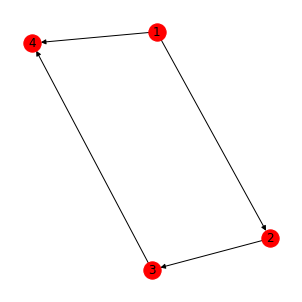

In [21]:
#What is Adjacent Matrix?
#The size of the matrix is VxV where V is the number of vertices in the graph and the value of an entry Aij is either 1 or 0 
#depending on whether there is an edge from vertex i to vertex j.

import networkx as nx
graph = nx.DiGraph() #(Creating a graph)
graph.add_edges_from([(1,2),(2,3),(3,4), (1,4)])  #Adding nodes and edges to graph

plt.figure(figsize=(4,4))
nx.draw(graph, pos=nx.spring_layout(graph), with_labels = True) #pos == position which means the positon on graph where each node lies
plt.draw()
print(nx.info(graph))

mat = nx.adjacency_matrix(graph)
mat.toarray()

In [25]:
print("="*120)

### Adjacent Matrix for Graph Data

In [4]:
from scipy import sparse
adj_matrix = sparse.load_npz(r"F:\data\Facebook friend recommendation\mine\adjacent_matrix.npz")

In [5]:
adj_matrix = adj_matrix.asfptype()
from scipy.sparse.linalg import svds, eigs
u, s, v = svds(adj_matrix, k = 5)

print('Adjacency matrix Shape',adj_matrix.shape) #Here it means that each node is represented as a vector of size 5
print("U shape",u.shape)
print("S shape",s.shape)
print("V shape",v.shape)

Adjacency matrix Shape (1780708, 1780708)
U shape (1780708, 5)
S shape (5,)
V shape (5, 1780708)


In [6]:
train_graph_nodes = list(train_graph.nodes)
svd_index = sorted(list(train_graph.nodes))
svd_dict = dict(zip(svd_index,u))

In [7]:
def svd_features(node):
    z = svd_dict.get(node,[0.0, 0.0, 0.0, 0.0, 0.0])
    return list(z)

In [ ]:
train_data["svd_f1"],train_data["svd_f2"],train_data["svd_f3"],train_data["svd_f4"],train_data["svd_f5"] = \
                                                         train_data['source_node'].progress_apply(svd_features)

 50%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 3821119/7649348 [05:06<00:31, 123058.97it/s]

In [94]:
train_data["svd_f6"],train_data["svd_f7"],train_data["svd_f8"],train_data["svd_f9"],train_data["svd_f10"] = \
                                                         train_data['destination_node'].progress_apply(svd_features)

,source_node,destination_node,source_predecessor,source_successor,destination_predecessor,destination_successor,jaccard_for_predecessor,jaccard_for_successor,jaccard_for_pred_succ,cosine_for_predecessor,...,belongs_same_strongly_community,adar_index,pagerank_predecessor,pagerank_successor,katzCentrality_predecessor,katzCentrality_successor,hub_predecessor,hub_successor,authority_predecessor,authority_successor
0,1116096,98008,53,77,4,5,0.036364,0.051282,0.038462,0.009434,...,0,1.359393,1.766496e-06,2.973301e-07,0.000920,0.000757,1.063084e-14,8.050301e-16,3.904481e-14,2.885838e-15
1,1802090,138943,13,7,15,10,0.166667,0.133333,0.222222,0.020513,...,0,1.663277,1.104992e-06,4.826087e-07,0.000783,0.000781,3.201043e-14,3.201585e-14,1.039542e-15,1.621770e-15
2,725604,1631748,3,4,2,0,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,1.650606e-06,2.678509e-07,0.000754,0.000739,1.227069e-17,1.846375e-20,2.572396e-18,6.057453e-18
3,430881,127882,19,11,16,19,0.521739,0.304348,0.350000,0.039474,...,0,5.722252,5.350317e-07,5.827873e-07,0.000787,0.000791,1.361818e-19,3.025044e-19,1.988917e-18,1.007531e-18
4,1134745,1613651,15,69,86,99,0.097826,0.486726,0.476190,0.006977,...,0,13.577117,2.479396e-07,8.159082e-07,0.000825,0.001308,4.737978e-11,4.995488e-11,4.186063e-12,2.621834e-11
